In [2]:
!pip install face_recognition

  Using cached face_recognition-1.3.0-py2.py3-none-any.whl.metadata (21 kB)
  Using cached face_recognition_models-0.3.0.tar.gz (100.1 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.4 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.4 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.4 MB ? eta -:--:--
     --- ------------------------------------ 0.3/3.4 MB ? eta -:--:--
     ------ --------------------------------- 0.5/3.4 MB 381.0 kB/s eta 0:00:08
     ------ ----------------------------

In [1]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.8 MB ? eta -:--:--
   - ----------------------------------

In [2]:
!pip install pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
    --------------------------------------- 0.3/11.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.5 MB 250.4 kB/s eta 0:00:44
   - -------------------------------------- 0.5/11.5 MB 250.4 kB/s eta 0:00:44
   - -------------------------------------- 0.5/11.5 MB 250.4 kB/s eta 0:00:44
   - -------------------------------------- 0.5/11.5 MB 250.4 kB/s eta 0:00:44
   - -------------------------------------- 0.5/11.5 MB 250.4 kB/s eta 0:00:44
   -- ------------------------------------- 0.8/11.5 MB 246.7 kB/s eta 0:00:44
   -- -----------------------------------

In [1]:
from PIL import Image, ImageDraw
import face_recognition
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import face_recognition
import pandas as pd

In [5]:
!pip install opencv-python


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
    --------------------------------------- 0.5/38.8 MB 310.6 kB/s eta 0:02:04
    --------------------------------------- 0.5/38.8 MB 310.6 kB/s eta 0:02:04
    --------------------------------------- 0.5/38.8 MB 310.6 kB/s eta 0:02:04
    --------------------------------------- 0.5/38.8 MB 310.6 k

Name of Students:  ['Aditya', 'Chandler', 'Datta', 'Gokul', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross', 'Sahil', 'Sanket', 'Vaibhav']
Aditya: Present
Gokul: Present
Vaibhav: Present
Sanket: Present
Datta: Present
: Present


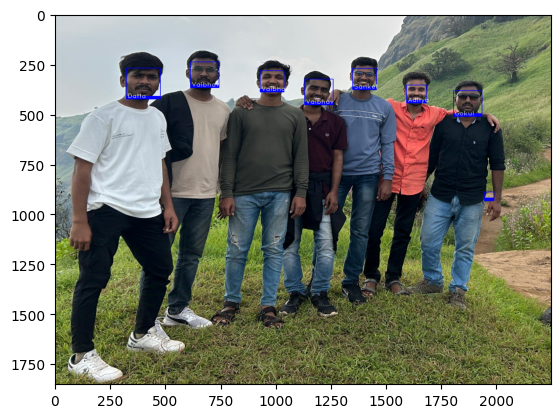

In [2]:
import cv2
import numpy as np
import os

path = "D:\\personal work\\Automated-Attendance-System-using-Computer-Vision-main\\train\\"

known_names = []
known_name_encodings = []
attendance = {}
recognized_names = []
images = os.listdir(path)
for _ in images:
    image = face_recognition.load_image_file(path + _)
    image_path = path + _
    encoding = face_recognition.face_encodings(image)[0]

    known_name_encodings.append(encoding)
    known_names.append(os.path.splitext(os.path.basename(image_path))[0].capitalize())

print("Name of Students: ",known_names)

test_image = r"D:\personal work\Automated-Attendance-System-using-Computer-Vision-main\test\group.jfif"
image = cv2.imread(test_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

face_locations = face_recognition.face_locations(image)
face_encodings = face_recognition.face_encodings(image, face_locations)

for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    matches = face_recognition.compare_faces(known_name_encodings, face_encoding)
    name = ""

    face_distances = face_recognition.face_distance(known_name_encodings, face_encoding)
    best_match = np.argmin(face_distances)

    if matches[best_match]:
        name = known_names[best_match]

    attendance[name] = "Present"
    recognized_names.append(name)

    cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 255), 2)
    cv2.rectangle(image, (left, bottom - 15), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

for student, status in attendance.items():
      print(f"{student}: {status}")


# Fill absent students' attendance as "Absent"
attendance_df = pd.DataFrame({"Name": known_names, "Attendance": ["Present" if name in recognized_names else "Absent" for name in known_names]})

# Save the attendance record to Excel
attendance_df.to_excel("attendance.xlsx", index=False)

#plt.imshow("Result", image)
plt.imshow(image, aspect='auto')
cv2.imwrite("./output.jpg", image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
print("Name","Attendance",known_names, ["Present" if name in recognized_names else "Absent" for name in known_names])

Name Attendance ['Aditya', 'Chandler', 'Datta', 'Gokul', 'Joey', 'Monica', 'Phoebe', 'Rachel', 'Ross', 'Sahil', 'Sanket', 'Vaibhav'] ['Present', 'Absent', 'Present', 'Present', 'Absent', 'Absent', 'Absent', 'Absent', 'Absent', 'Absent', 'Present', 'Present']


In [4]:
from tabulate import tabulate

# Create a list of lists to hold the attendance data
attendance_data = []
for name in known_names:
    attendance_data.append([name, "Present" if name in recognized_names else "Absent"])

# Print the attendance data in tabular format
print(tabulate(attendance_data, headers=["Name", "Attendance"], tablefmt="grid"))


+----------+--------------+
| Name     | Attendance   |
+==========+==============+
| Aditya   | Present      |
+----------+--------------+
| Chandler | Absent       |
+----------+--------------+
| Datta    | Present      |
+----------+--------------+
| Gokul    | Present      |
+----------+--------------+
| Joey     | Absent       |
+----------+--------------+
| Monica   | Absent       |
+----------+--------------+
| Phoebe   | Absent       |
+----------+--------------+
| Rachel   | Absent       |
+----------+--------------+
| Ross     | Absent       |
+----------+--------------+
| Sahil    | Absent       |
+----------+--------------+
| Sanket   | Present      |
+----------+--------------+
| Vaibhav  | Present      |
+----------+--------------+
